## ABSTRACT 

In this notebook, we delve into constructing neural networks for recognizing digits within the MNIST dataset, a well-known collection of handwritten digit images. Additionally, we examine the TMNIST Alphabet dataset, featuring 94 different characters depicted in grayscale images of dimensions 28x28. This dataset, comprising 281,000 images, serves as a valuable resource for training and evaluating machine learning models in character recognition tasks. While various deep learning frameworks offer convenient APIs for loading such datasets, understanding the data preparation process remains crucial for effective model training.

## TMNIST Dataset

MNIST style images of the following 94 alphabetic characters:

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\', ']', '^', '_', '`', '{', '|', '}', '~'}

In [158]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


## Importing all the libraries

In [159]:
import warnings
warnings.filterwarnings("ignore")

# Import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist
import tensorflow as tf

sns.set(style='white', context='notebook', palette='deep')

## Reading the data

In [160]:
# Reading Data
df = pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Checking the shape of the data

In [161]:
print(f"The Shape of the Dataset is: {df.shape}")
print(f"The Number of Samples: {df.shape[0]}")
print(f"The Number of Features: {df.shape[1]}")

The Shape of the Dataset is: (274093, 786)
The Number of Samples: 274093
The Number of Features: 786


### Checking the labels and number of unique characters 

In [162]:
all_unique_chars = df['labels'].unique().tolist()
print(all_unique_chars)

num_of_unique_chars = len(df.labels.unique())
print('Length of unique characters: ',num_of_unique_chars)

['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']
Length of unique characters:  94


### Dropping unnecessary columns 

In [163]:
X = df.drop(columns=['names','labels']).values
y = df[['labels']].values

In [164]:
y.shape

(274093, 1)

In [165]:
df_x = pd.DataFrame(X)
df_y = pd.DataFrame(y)

In [166]:
print('Shape of Dataframe x: ',df_x.shape)
print('Shape of Dataframe y: ',df_y.shape) 

Shape of Dataframe x:  (274093, 784)
Shape of Dataframe y:  (274093, 1)


## Plotting Images

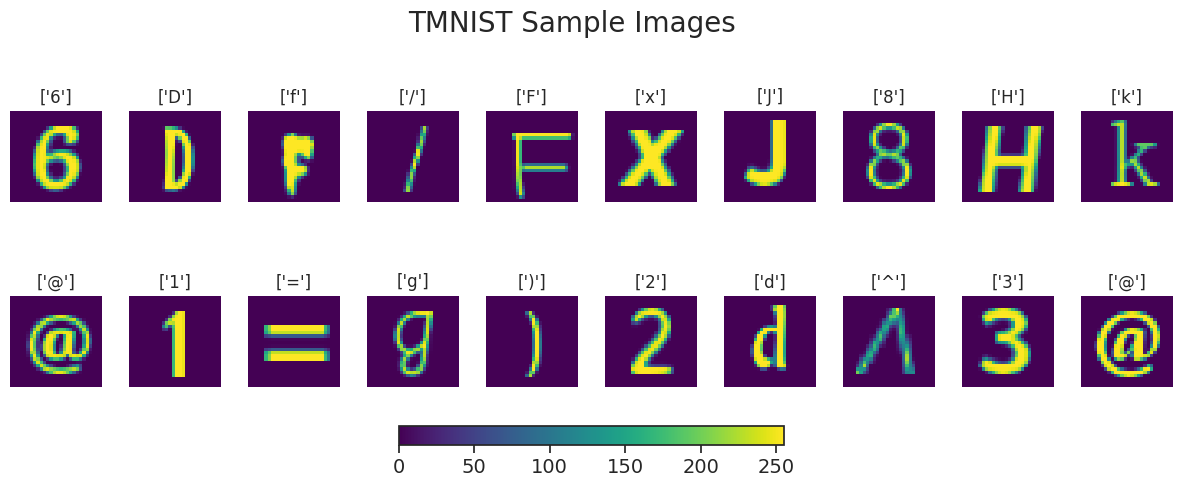

In [188]:
import matplotlib.pyplot as plt
 
# Assuming the first column ('label') needs to be excluded from X before reshaping
X_pixels = X.reshape(-1, 28, 28)  # Reshape X to 28x28 images
 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 5))  # Adjust the number of rows and columns and figsize
fig.suptitle("TMNIST Sample Images", fontsize=20)
 
for i, ax in enumerate(axes.flat):
    img = ax.imshow(X_pixels[i], cmap='viridis')  # Change the colormap to 'viridis'
    ax.set_title(str(y[i]), fontsize=12)
    ax.axis('off')  # Remove axis ticks
 
plt.subplots_adjust(hspace=0.3, wspace=0.3)
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.1)
cbar.ax.tick_params(labelsize=14)
 
plt.show()

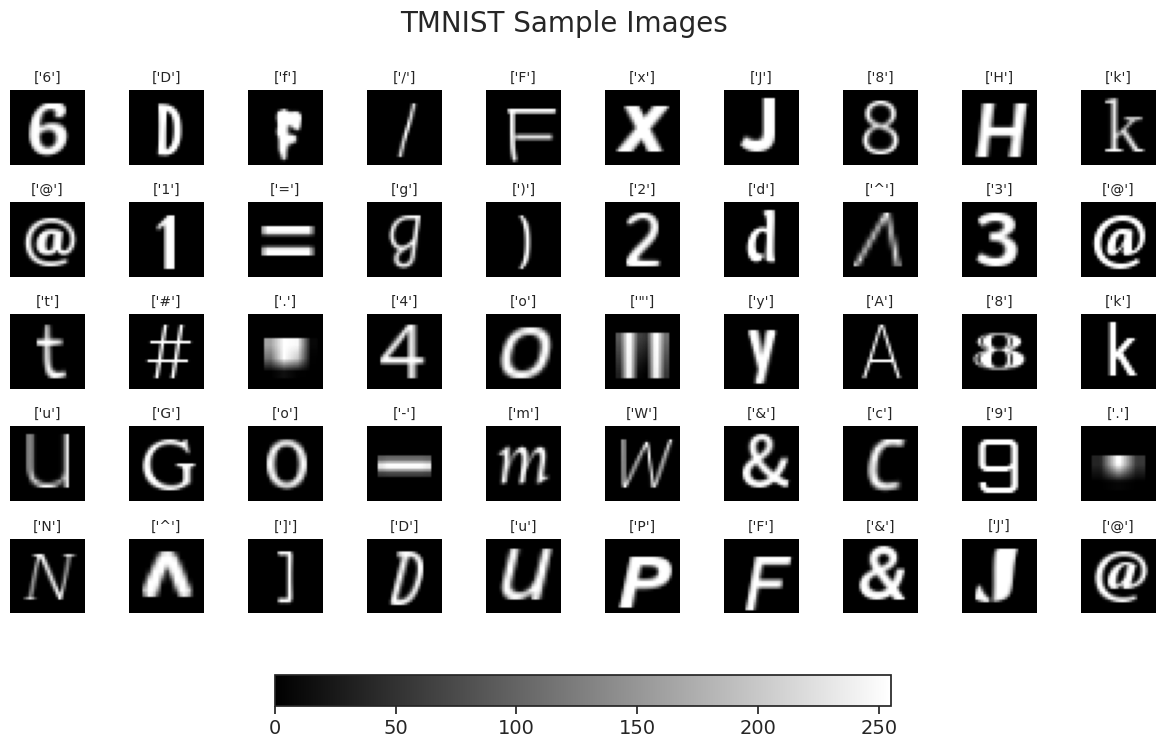

In [189]:
import matplotlib.pyplot as plt
 
# Assuming the first column ('label') needs to be excluded from X before reshaping
X_pixels = X.reshape(-1, 28, 28)  # Reshape X to 28x28 images
 
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(15, 8))  # Adjust the number of rows and columns and figsize
fig.suptitle("TMNIST Sample Images", fontsize=20)
 
for i, ax in enumerate(axes.flat):
    img = ax.imshow(X_pixels[i], cmap='gray')  # Change the colormap to 'inferno'
    ax.set_title(str(y[i]), fontsize=10)
    ax.axis('off')  # Remove axis ticks
 
plt.subplots_adjust(hspace=0.5, wspace=0.3)
cbar = fig.colorbar(img, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.05, pad=0.1)
cbar.ax.tick_params(labelsize=14)
 
plt.show()

## Spliting the data into train test set

In [168]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

### Checking the shape

In [169]:
print('X:Train, Test data shape: {}, {}'.format(X_train.shape, X_test.shape))
print('Y:Train, Test data shape: {}, {}'.format(y_train.shape, y_test.shape))

X:Train, Test data shape: (219274, 784), (54819, 784)
Y:Train, Test data shape: (219274, 1), (54819, 1)


## Normalizing Pixel Values

In [170]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## One-Hot Encoding for categorical labels 

In [171]:
from sklearn.preprocessing import OneHotEncoder
char_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
y_train_encoded = char_enc.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = char_enc.transform(y_test.values.reshape(-1, 1))

## Reshaping Image Data for Neural Network Input

In [172]:
new_shape = (-1, 28, 28)
X_train_norm = np.reshape(X_train.values, new_shape)
X_test_norm = np.reshape(X_test.values, new_shape)

## CNN Sequential Model

1. Convolutional Layers: These layers apply convolution operations to the input images using learnable filters (also known as kernels). Each filter detects specific patterns or features in the input image, such as edges, textures, or shapes. Convolutional layers enable the network to learn hierarchical representations of the input images by capturing local spatial patterns.

2. Pooling Layers: Pooling layers downsample the feature maps generated by convolutional layers. The most common pooling operation is max pooling, which extracts the maximum value from a fixed-size window in each feature map. Pooling layers help reduce the spatial dimensions of the feature maps, making the network more computationally efficient and reducing the risk of overfitting.

3. Activation Functions: Activation functions introduce non-linearity into the network, allowing it to learn complex patterns and relationships in the data. Common activation functions used in CNNs include ReLU (Rectified Linear Unit), which replaces negative values with zero, and softmax, which normalizes the output values into a probability distribution over multiple classes.

4. Fully Connected Layers: Fully connected layers, also known as dense layers, are typically used at the end of the CNN architecture to perform classification or regression tasks. These layers connect every neuron in one layer to every neuron in the next layer, allowing the network to learn complex, high-level representations of the input data.

5. Batch Normalization: Batch normalization is a technique used to stabilize and accelerate the training of deep neural networks. It normalizes the activations of each layer by adjusting and scaling the inputs to the activation functions. Batch normalization helps prevent the vanishing or exploding gradients problem during training and allows for faster convergence.

![Convolutional Neural Network](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [173]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

callback = EarlyStopping(monitor='loss', patience=3) 

cnn_model = Sequential([
    Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_of_unique_chars, activation='softmax')
])

opt = Adam()
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 24, 24, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 10, 10, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 94)             │         3,102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,766 (721.74 KB)

 Trainable params: 184,766 (721.74 KB)

 Non-trainable params: 0 (0.00 B)

## Fitting the Model

In [182]:
model_history = cnn_model.fit(X_train_norm, y_train_encoded, epochs=10, validation_data=(X_test_norm, y_test_encoded), callbacks=[callback], verbose=1, batch_size=128)

Epoch 1/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 263s 153ms/step - accuracy: 0.9245 - loss: 0.2409 - val_accuracy: 0.9185 - val_loss: 0.2583
Epoch 2/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 266s 155ms/step - accuracy: 0.9308 - loss: 0.2139 - val_accuracy: 0.9299 - val_loss: 0.2319
Epoch 3/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 260s 151ms/step - accuracy: 0.9362 - loss: 0.1932 - val_accuracy: 0.9314 - val_loss: 0.2215
Epoch 4/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 260s 150ms/step - accuracy: 0.9405 - loss: 0.1777 - val_accuracy: 0.9329 - val_loss: 0.2186
Epoch 5/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 259s 151ms/step - accuracy: 0.9442 - loss: 0.1639 - val_accuracy: 0.9314 - val_loss: 0.2205
Epoch 6/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 259s 151ms/step - accuracy: 0.9463 - loss: 0.1562 - val_accuracy: 0.9350 - val_loss: 0.2159
Epoch 7/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 260s 151ms/step - accuracy: 0.9492 - loss: 0.1464 - val_accuracy: 0.9363 - val_loss: 0.2159
Epoch 8/10
1714/1714 ━━━━━━━━━━━━━━━━━━━━ 259s 151ms/step - ac

1. epochs=10:
The epochs parameter specifies the number of times the entire training dataset will be passed forward and backward through the neural network during training. In this case, the value is set to 10, indicating that the training process will iterate over the entire dataset 10 times.

2. validation_data=(X_test_norm, y_test_encoded):
The validation_data parameter is used to specify the data on which to evaluate the model's performance after each epoch. Here, X_test_norm represents the normalized test images, and y_test_encoded represents the corresponding one-hot encoded labels. During training, the model's performance on this validation data will be monitored to assess its generalization ability.

3. callbacks=[callback]:
The callbacks parameter allows us to specify a list of callback functions to be applied during training. Callbacks are objects that perform specific actions at various stages of training. Here, callback refers to an instance of the EarlyStopping callback, which monitors the training process and stops training early if certain criteria are met, such as no improvement in the loss metric after a specified number of epochs (patience).

4. verbose=1:
The verbose parameter controls the amount of information displayed during training. A value of 1 indicates that progress bars and epoch information will be printed to the console during training, providing real-time updates on the training process.

5. batch_size=128:
The batch_size parameter determines the number of training examples utilized in each iteration of training. Instead of updating the model's parameters after processing the entire dataset (batch gradient descent), training occurs in mini-batches. In this case, the batch size is set to 128, meaning that the model will process 128 examples at a time before updating its parameters based on the computed gradients. Adjusting the batch size can influence the training dynamics and memory requirements.

## Plotting the results (Accuracy/Loss vs Epochs Graphs)

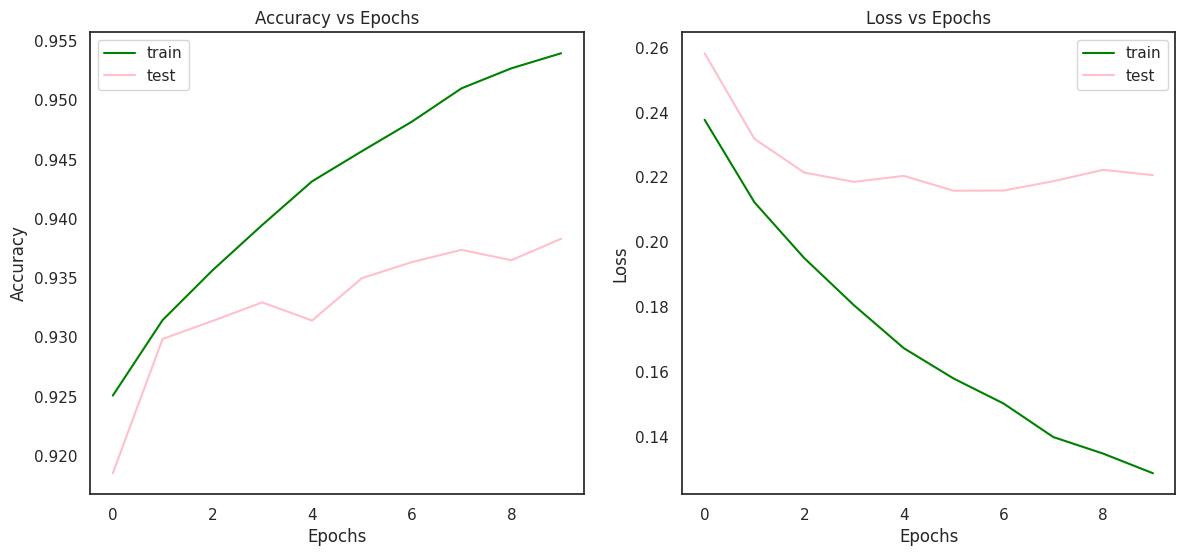

In [183]:
# Plotting Results
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

epochs = np.arange(10)

# Plot accuracy vs epochs
axs[0].set_title('Accuracy vs Epochs')
axs[0].plot(epochs, model_history.history['accuracy'], color='green', label='train')
axs[0].plot(epochs, model_history.history['val_accuracy'], color='pink', label='test')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss vs epochs
axs[1].set_title('Loss vs Epochs')
axs[1].plot(epochs, model_history.history['loss'], color='green', label='train')
axs[1].plot(epochs, model_history.history['val_loss'], color='pink', label='test')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.show()

1. Model Accuracy Plot:
- The x-axis typically represents the number of epochs or training iterations, while the y-axis represents the model's accuracy.
- There are two lines on the graph: one for training accuracy and one for validation accuracy.
- The training accuracy line shows how well the model performs on the training data during each epoch. It should generally increase over time, indicating that the model is learning from the training data.
- The validation accuracy line shows how well the model performs on a separate validation dataset (not used for training) during each epoch. It gives an indication of how well the model generalizes to unseen data.
- Both lines increase to a high value. If the training accuracy continues to increase while the validation accuracy starts decreasing or remains stagnant, it might indicate overfitting.

2. Model Loss Plot:
- The x-axis represents epochs or training iterations, while the y-axis represents the model's loss.
- Again, there are two lines: one for training loss and one for validation loss.
- The training loss line shows the model's error on the training data during each epoch. It should generally decrease over time, indicating that the model is improving.
- The validation loss line shows the model's error on the validation data during each epoch. It provides insight into how well the model generalizes to unseen data.
- Both lines decrease to a low value. If the training loss continues to decrease while the validation loss starts increasing or remains stagnant, it might indicate overfitting.

## Model Predictions 

In [184]:
predictions = cnn_model.predict(X_test_norm)

# Converting one-hot encoded predictions to actual labels
predicted_labels = char_enc.inverse_transform(predictions)

# Converting actual one-hot encoded labels to actual labels
actual_labels = char_enc.inverse_transform(y_test_encoded)

# Printing predictions and actual labels
for i in range(10):
    print(f"Predicted: {predicted_labels[i][0]}, Actual: {actual_labels[i][0]}")

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step
Predicted: I, Actual: I
Predicted: 3, Actual: 3
Predicted: &, Actual: &
Predicted: j, Actual: j
Predicted: E, Actual: E
Predicted: k, Actual: k
Predicted: ', Actual: '
Predicted: I, Actual: I
Predicted: V, Actual: V
Predicted: j, Actual: j


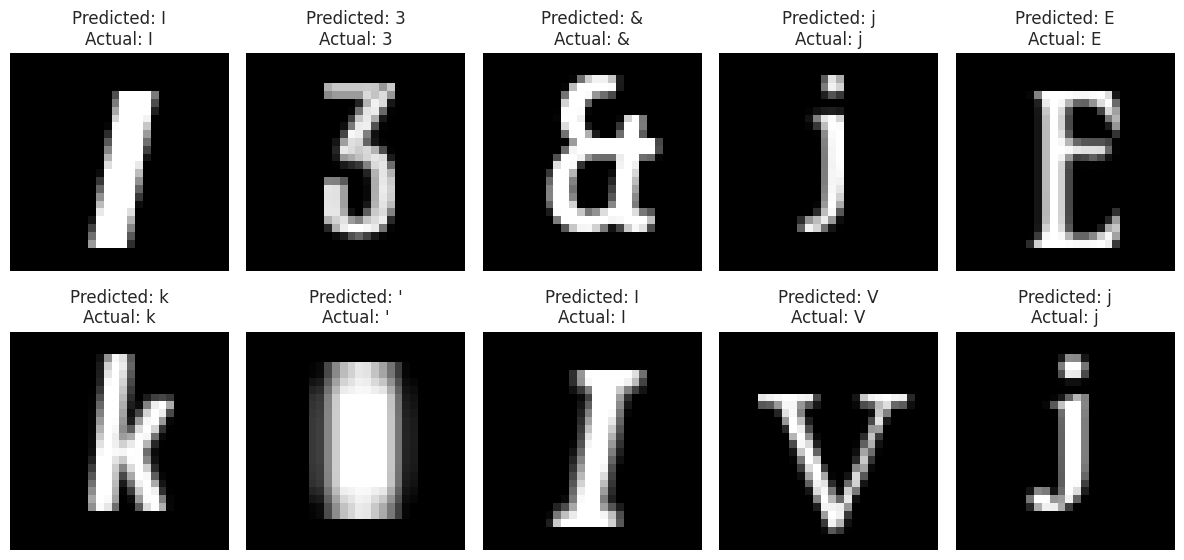

In [185]:
import matplotlib.pyplot as plt

# Ploting predictions and their corresponding images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test_norm[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i][0]}\nActual: {actual_labels[i][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## CONCLUSION 

- Exceptional Accuracy: The model demonstrates remarkable precision, achieving a high level of correspondence between its predictions and the actual characters and digits within the dataset.

- Effective Learning Mechanism: The model exhibits significant proficiency in extracting salient patterns and features from the training data, indicative of its robust learning capabilities.

- Confidence in Inference: Evident from its consistent and accurate predictions across various characters and digits, the model showcases a high degree of confidence in its inference capabilities.

- Generalization and Adaptability: The model demonstrates adeptness in generalizing its learned representations to novel characters and digits, underscoring its adaptability to diverse inputs and contexts.

## REFERENCES 

- Keras Documentation - https://keras.io/api/layers/convolution_layers/ 
- Matplotlib Documentation - https://matplotlib.org/ 
- Pandas Documentation - https://pandas.pydata.org/docs/
- Tensorflow Documentation - https://www.tensorflow.org/guide/intro_to_modules 
- SkLearn Documentation - https://scikit-learn.org/stable/
- Kaggle Notebook - https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy/notebook 

## LICENSE

MIT License

Copyright (c) 2024 pranitee23

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.